In [12]:
# Yolo - You Only Look Once - Single Stage Detector
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [13]:
# Config File
config_path = "C:/Users/dell/Downloads/Image/Yolo/yolov3.cfg"
# Weights are just using already trained model
weights = "C:/Users/dell/Downloads/Image/Yolo/yolov3.weights"
labels = open("C:/Users/dell/Downloads/Image/Yolo/coco.names").read().strip().split("\n")

In [14]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [15]:
len(labels)

80

In [16]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
# Intersection over Union - IOU value used in object detection to measure the overlap of overall predicted actual box of object
IOU_THRESHOLD = 0.5

In [17]:
# Using DNN algorithm of opencv build a model by loading weights of trained model yolov3
net = cv2.dnn.readNetFromDarknet(config_path, weights)

In [18]:
# Different Colors for different objects 
colors = np.random.randint(0, 255, size = (len(labels), 3), dtype = 'uint8')

In [23]:
# Create a Model
def model_output(path_name):
    image = cv2.imread(path_name)
    file_name = os.path.basename(path_name)
    # File Name & Extension
    filename, ext = file_name.split(".")
    h, w = image.shape[:2]
    # blob = Image data
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416,416), swapRB = True)
    # set DNN (Yolo) Model Layer
    net.setInput(blob)
    ln = net.getLayerNames()
    # Get getUnconnectedOut Layers is used to obtain indexes of the unconnected output layers in order
    # to find how far farward() must execute.
    #ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
    # layer_outputs will be storing predicted probability 
    layer_outputs = net.forward(ln)
    boxes, confidences, class_ids = [], [], []
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            # multiclass probebility for its class label [0.05, 0.9, 0.05]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > CONFIDENCE:
                box = detection[:4]*np.array([w,h,w,h])
                # Center coordinates of box (for detected object), total width of object, total length of object
                (centerX, centerY, width, height) = box.astype("int")
                # start coordinate
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x,y,int(width),int(height)])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    return boxes, confidences, class_ids

In [24]:
def detection_recognition(path_name):
    image = cv2.imread(path_name)
    boxes, confidences, class_ids = model_output(path_name)
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)
    font_scale = 1
    thickness = 2
    
    if len(idxs) > 0:
        for i in idxs.flatten():
            x, y = boxes[i][0], boxes[i][1]
            w,h = boxes[i][2], boxes[i][3]
            color = [ int(c) for c in colors[class_ids[i]]]
            cv2.rectangle(image, (x,y), (x+w, y+h), color = color, thickness = thickness)
            # To display upto 2 decimal places confidence score => Accuracy
            text = f"{labels[class_ids[i]]} : {confidences[i]: .2f}"
            (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
            text_offset_x = x
            text_offset_y = y - 5
            box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
            overlay = image.copy()
            cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
            image = cv2.addWeighted(overlay, 0.8, image, 0.2, 0)#add two copies to one and the numbers define blending percent
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=font_scale, color=(0, 0, 0), thickness=thickness)
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

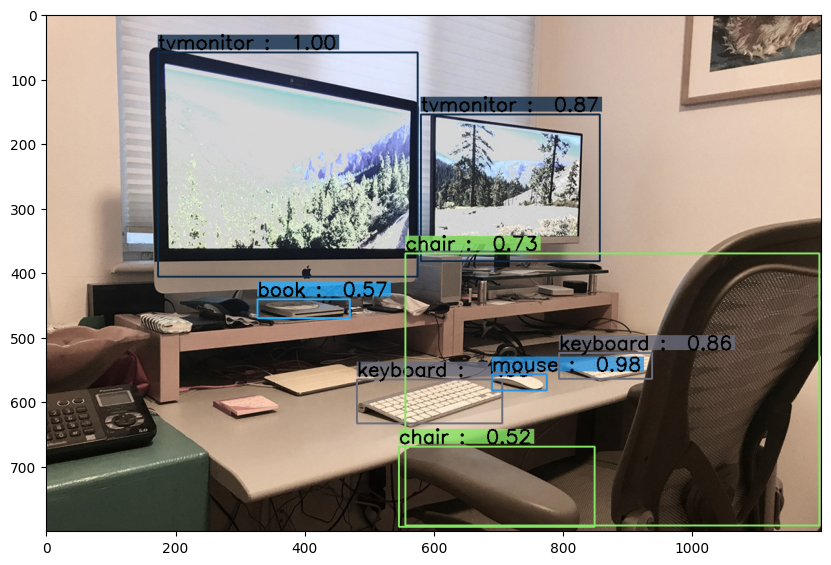

In [26]:
detection_recognition("C:/Users/dell/Downloads/Image/Yolo/home_office.jpg")